<a href="https://colab.research.google.com/github/asrianda/jurnal/blob/main/program_riva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from scipy.io import arff

# Baca file .arff
data, meta = arff.loadarff('dataset_31_credit-g.arff')

# Konversi ke DataFrame
df = pd.DataFrame(data)

# Jika ada kolom bertipe byte, ubah jadi string
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].str.decode('utf-8')

# Simpan ke Excel
df.to_excel('dataset_31_credit-g.xlsx', index=False)

print("Data berhasil disimpan ke Excel!")


Data berhasil disimpan ke Excel!


In [2]:
df=pd.read_excel('dataset_31_credit-g.xlsx')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [3]:
df['class'].value_counts()

,count
class,
good,700
bad,300


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [6]:
df=pd.read_excel('main_data.xlsx')
df.head()

,NO,NAMA SISWA,NISN,NIS,PAI,PKn,BIN,MTK,SEI,BIG,SEB,PJOK,PRA,GEO,SEJ,Sos,Eko,Status Prestasi
0,1,Abzal Lul Zikri,72511701,5092,Baik,Baik,Baik,Cukup,Baik,Cukup,Cukup,Baik,Baik,Cukup,Baik,Cukup,Cukup,Berprestasi
1,2,ADEHAM MAULIZAN,86251151,12677,Sangat Baik,Sangat Baik,Baik,Cukup,Cukup,Baik,Baik,Baik,Sangat Baik,Baik,Baik,Baik,Baik,Berprestasi
2,3,ADELIA SAFIRA,99340413,12944,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Berprestasi
3,4,Adriansyah,71492013,5093,Baik,Cukup,Baik,Baik,Baik,Baik,Cukup,Baik,Baik,Baik,Baik,Cukup,Baik,Berprestasi
4,5,Adynda Muthia Nazwa,76510310,5222,Baik,Baik,Sangat Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Berprestasi


In [7]:
df['Status Prestasi'].value_counts()

,count
Status Prestasi,
Berprestasi,593
Tidak Berprestasi,39



Akurasi Random Forest (entropy): 98.95%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.92      0.92      0.92        12

    accuracy                           0.99       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.99      0.99      0.99       190

Confusion Matrix:
[[177   1]
 [  1  11]]


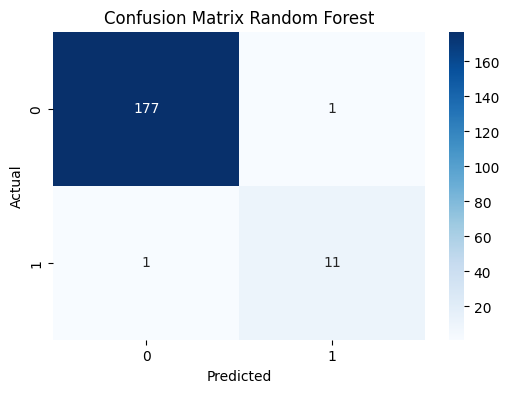

<ipython-input-16-d8fcde47cd69>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances, y=feat_importances.index, palette='viridis')


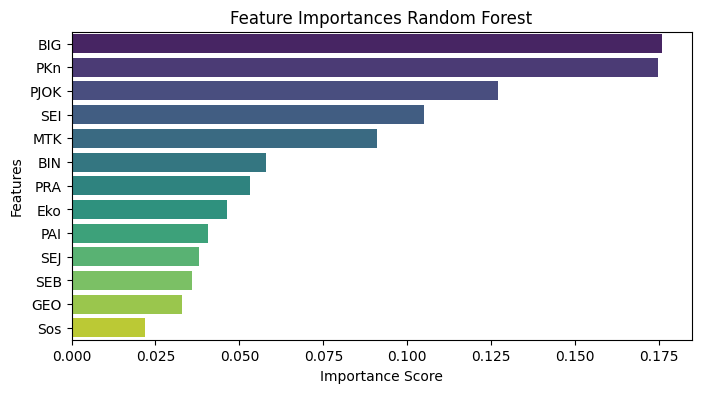

In [16]:
# =============================
# Import Library
# =============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# =============================
# 1. Baca Dataset dari Excel
# =============================
df = pd.read_excel('main_data.xlsx')

# Tampilkan beberapa baris untuk cek
#print(df.head())

# =============================
# 2. Encoding Data (Konversi Teks ke Angka)
# =============================
df_encoded = df.copy()

le = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object' or df_encoded[col].dtype == 'float64' or df_encoded[col].dtype == 'int64':
        df_encoded[col] = df_encoded[col].astype(str)  # Paksa semua jadi string
        df_encoded[col] = le.fit_transform(df_encoded[col])

# =============================
# 3. Persiapan Data
# =============================
# Target adalah kolom 'Status Prestasi'
target_column = 'Status Prestasi'

X = df_encoded.drop(columns=[target_column, 'NO', 'NAMA SISWA', 'NISN', 'NIS'])  # Hapus kolom ID dan Nama
y = df_encoded[target_column]  # Label

# Split: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# =============================
# 4. Random Forest dengan Criterion 'entropy'
# =============================
rf = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    random_state=42
)

# Train model
rf.fit(X_train, y_train)

# Prediksi
y_pred = rf.predict(X_test)

# =============================
# 5. Evaluasi Model
# =============================
acc = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Random Forest (entropy): {acc*100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# =============================
# 6. Visualisasi Confusion Matrix
# =============================
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# =============================
# 7. Visualisasi Feature Importance
# =============================
importances = rf.feature_importances_
feature_names = X.columns

# Urutkan berdasarkan pentingnya
feat_importances = pd.Series(importances, index=feature_names)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=feat_importances, y=feat_importances.index, palette='viridis')
plt.title('Feature Importances Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
